# $\text{EVALUACION  2}$

Gustavo Medina

In [1]:
#Importamos las bibliotecas a utilizar:
import numpy as np
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt
from math import exp, sqrt, pi
import math

# $\text{Problema 1:}$

Resuelva numericamente primero el caso de un oscilador amortiguado caso sin forzamiento ($\zeta \neq 0, F_0=0).$

Suponga que: $m=1, k=9, x(0)<0,x'(0)=0$

Reproduzca una grafica similar para los distintos casos de amortiguamiento:

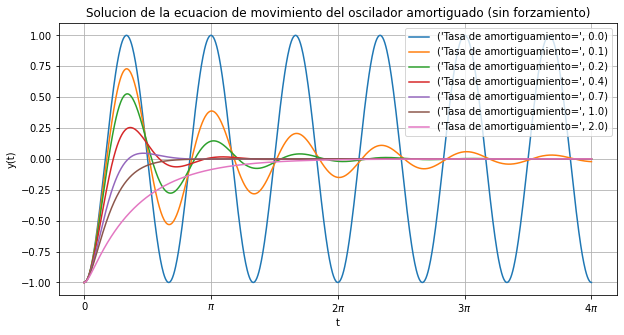

In [6]:
#Definicion
def Problema1(y,t,z,w0):
   x,v = y
   dydt =  [v,-2*z*wn*v - x*wn**2]
   return dydt

#Declarando las condiciones iniciales
y0 = [-1.0,0.0]

#Tiempo de integracion:
tm = 4*np.pi
t = np.linspace(0, tm, 1000)
aerr = 1.0e-8
rerr = 1.0e-6

plt.figure(figsize=(10,5))

k=9
m=1
wn=np.sqrt(k/m)

z1=[0.0,0.1,0.2,0.4,0.7,1.0,2.0]

#Loop generador
for z in z1:
  y = odeint(Problema1, y0, t, args=(z,wn), atol=aerr, rtol=rerr)

  plt.plot(t, y[:, 0], label=('Tasa de amortiguamiento=',z))
  plt.legend(loc='best')
  plt.title('Solucion de la ecuacion de movimiento del oscilador amortiguado (sin forzamiento)')
  plt.xlabel('t')
  plt.xticks([0,np.pi,2*np.pi,3*np.pi,4*np.pi],[r'0',r'$\pi$',r'$2\pi$',r'$3\pi$',r'$4\pi$'])
  plt.ylabel('y(t)')  
  plt.grid()
plt.show()


# $\text{Problema 2:}$

Resuelva numericamente el caso de un oscilador forzado sin amortiguamiento ($\zeta = 0, F_0 \neq 0$). 

Suponga que: $F_0=1, m=1, k=9, x(0) = 0, x'(0) = 0$. 

Reproduzca una grafica similar para los siguientes casos donde la frecuencia de forzamiento es: $\omega = 3, 3.1, 3.3, 3.5$

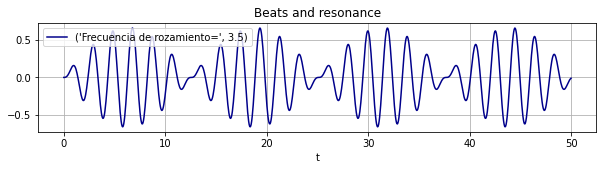

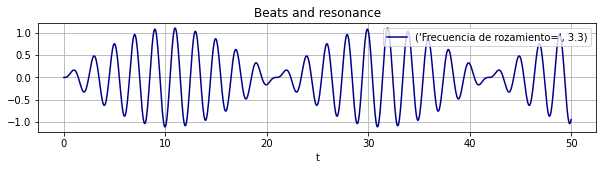

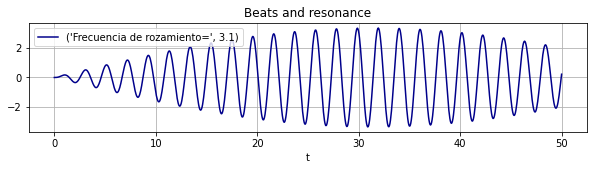

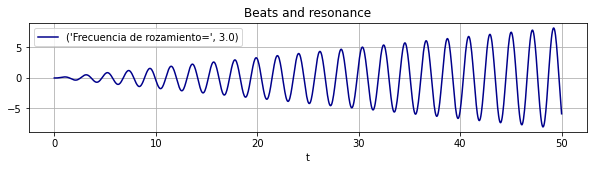

In [10]:
def Problema2(y,t,w,m,F0,wn):
  x,v = y
  dydt = [v,(F0/m)*np.sin(w*t)-x*wn**2]
  return dydt

#Condiciones iniciales:
y0 = [0.0,0.0]

#Tiempo de integracion: 
t = np.linspace(0, 50, 1000)
aerr = 1.0e-8
rerr = 1.0e-6
k = 9
m = 1
wn = np.sqrt(k/m)
F0 = 1

w1 = [3.5,3.3,3.1,3.0]

#Loop generador:
for w in w1:
  y = odeint(Problema2, y0, t, args=(w,m,F0,wn), atol=aerr, rtol=rerr)

  
  plt.figure(figsize=(10,2))
  plt.plot( t, y[:, 0], color='DarkBlue', label=('Frecuencia de rozamiento=',w))
  plt.legend(loc='best')
  plt.title('Beats and resonance')
  plt.xlabel('t') 
  plt.grid()
  plt.show()


# $\text{Problema 3:}$

Ahora resolvemos el caso completo de un oscilador amortiguado y forzado con una fuerza sinoidal ($\zeta \neq 0, F_0 \neq 0$)

Suponga un coeficiente de amortiguamiento $\zeta =0.1$. 

Tome los mismos valores del problema anterior: $F=1, m=1, k=9, x(0) = 0, x'(0) = 0$. 

Reproduzca una grafica en el plano fase ($x,x'$), para las frecuencias de forzamiento: $\omega = 3, 3.1, 3.3, 3.5$, que muestre que sucede con las soluciones del oscilador forzado en el caso amortiguado. 

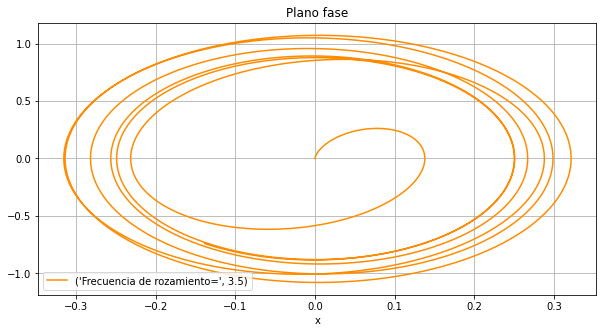

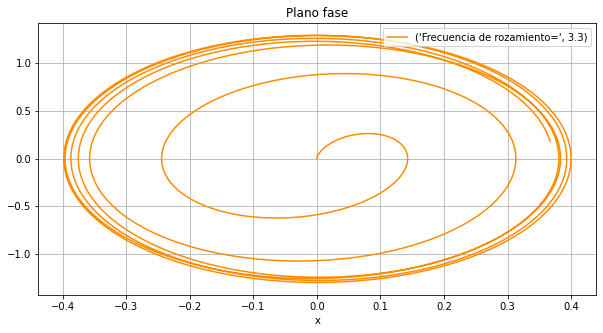

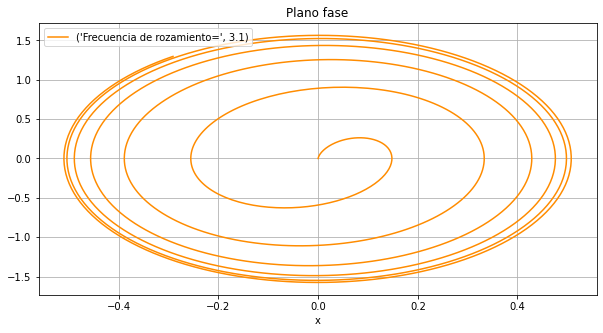

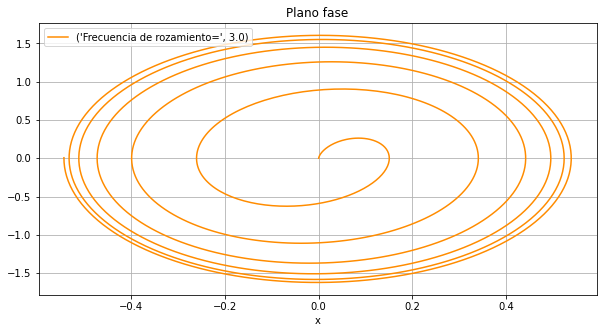

In [13]:
def Problema3(y,t,w,z,m,F0,wn):
  x,v = y
  dydt = [v,(F0/m)*np.sin(w*t)-2*z*wn*v-x*wn**2]
  return dydt

#Condiciones iniciales:
y0 = [0.0,0.0]

#Tiempo de integracion
tm = 4*np.pi
t = np.linspace(0, tm, 1000)
aerr = 1.0e-8
rerr = 1.0e-6
k = 9
m = 1
wn = np.sqrt(k/m)
F0 = 1
z = 0.1

w1 = [3.5,3.3,3.1,3.0]

#Loop generador
for w in w1:
  y = odeint(Problema3, y0, t, args=(w,z,m,F0,wn), atol=aerr, rtol=rerr)

  
  plt.figure(figsize=(10,5))
  plt.plot( y[:,0], y[:, 1], 'DarkOrange', label=('Frecuencia de rozamiento=',w))
  plt.legend(loc='best')
  plt.title('Plano fase')
  plt.xlabel('x') 
  plt.grid()

plt.show()

Esto concluye la evaluacion.